In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## PCA

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris=load_iris()

In [4]:
x=iris.data
y=iris.target

In [5]:
from sklearn.decomposition import PCA

### step 1. 開PCA機

In [6]:
pca=PCA(n_components=2)#壓到二維

### step 2.訓練、學習

In [7]:
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

### step 3. 預測

In [8]:
x[87]

array([6.3, 2.3, 4.4, 1.3])

In [10]:
X=pca.transform(x)

In [12]:
X[87]

array([ 0.81509524, -0.37203706])

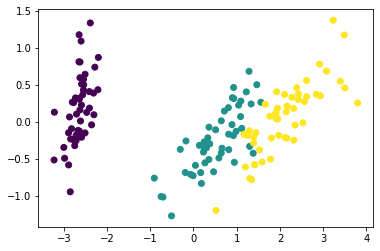

In [13]:
plt.scatter(X[:,0],X[:,1],c=y)

### 準備訓練測試資料

In [15]:
from sklearn.model_selection import train_test_split#讀入資料

In [18]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

### step1.開svc函數學習機

In [20]:
from sklearn.svm import SVC

In [23]:
clf=SVC(gamma="auto")

### step2.訓練

In [24]:
clf.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## step3.預測

In [25]:
y_predict=clf.predict(x_test)

In [26]:
y_predict

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

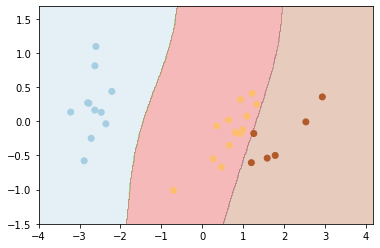

In [28]:
x0=np.arange(-4,4.2,0.02)
y0=np.arange(-1.5,1.7,0.02)

xm,ym=np.meshgrid(x0,y0)
P=np.c_[xm.ravel(),ym.ravel()]
z=clf.predict(P)
Z=z.reshape(xm.shape)
plt.contourf(xm,ym,Z,alpha=0.3,cmap="Paired")
plt.scatter(x_test[:,0],x_test[:,1],c=y_test,cmap="Paired")

## K-Means自動分類

In [29]:
x=np.random.rand(100,2)

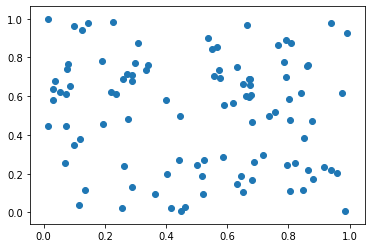

In [30]:
plt.scatter(x[:,0],x[:,1])

### step1.打開K-Means函數學習機

In [31]:
from sklearn.cluster import KMeans

In [33]:
clf=KMeans(n_clusters=3)

### step2.訓練

In [34]:
clf.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### step3.預測

In [35]:
clf.predict(x)

array([2, 2, 0, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 2, 0, 1, 1, 1, 2, 2, 1, 0,
       2, 2, 0, 1, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 1, 1,
       0, 1, 0, 0, 0, 2, 2, 1, 1, 0, 2, 0, 1, 1, 2, 2, 1, 2, 0, 2, 2, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 0, 2, 0, 0, 1, 1, 2, 0, 2, 0,
       1, 1, 2, 2, 0, 1, 1, 0, 2, 1, 0, 1])

In [36]:
clf.labels_

array([2, 2, 0, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 2, 0, 1, 1, 1, 2, 2, 1, 0,
       2, 2, 0, 1, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 1, 1,
       0, 1, 0, 0, 0, 2, 2, 1, 1, 0, 2, 0, 1, 1, 2, 2, 1, 2, 0, 2, 2, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 0, 2, 0, 0, 1, 1, 2, 0, 2, 0,
       1, 1, 2, 2, 0, 1, 1, 0, 2, 1, 0, 1])

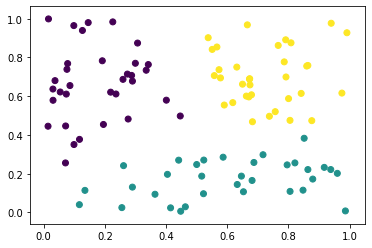

In [39]:
plt.scatter(x[:,0],x[:,1],c=clf.labels_)

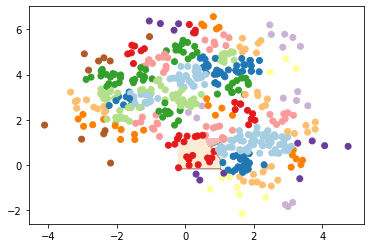

In [69]:
x0=y0=np.arange(-0.2,1.2,0.02)
xm,ym=np.meshgrid(x0,y0)
P=np.c_[xm.ravel(),ym.ravel()]
z=clf.predict(P)

Z=z.reshape(xm.shape)
plt.contourf(xm,ym,Z,alpha=0.3,cmap="Paired")
plt.scatter(x[:,0],x[:,1],c=clf.labels_,cmap="Paired")

### make_blobs 生更像真實世界的數據

In [70]:
from sklearn.datasets.samples_generator import make_blobs

In [71]:
x,y=make_blobs(n_samples=500,centers=3,n_features=2,random_state=0)

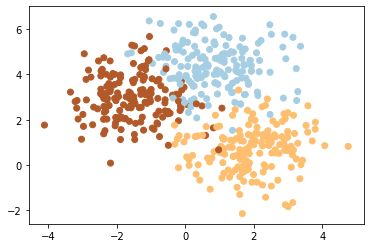

In [72]:
plt.scatter(x[:,0],x[:,1],c=y,cmap="Paired")

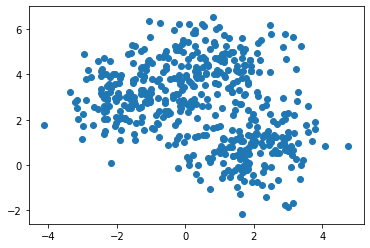

In [73]:
plt.scatter(x[:,0],x[:,1])

### step1.打開KMeans函數學習機

In [74]:
clf=KMeans(n_clusters=3)

### step2.訓練

In [75]:
clf.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### step3.預測

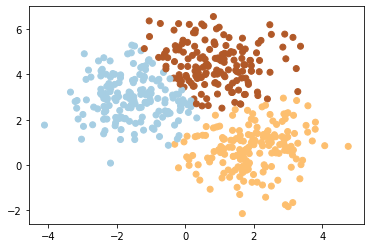

In [76]:
plt.scatter(x[:,0],x[:,1],c=clf.labels_,cmap='Paired')

### Mean-Shif完全自動分類

### step1.打開函數學習機

In [77]:
from sklearn.cluster import MeanShift

In [82]:
clf=MeanShift(bandwidth=0.9)

### step2.訓練

In [83]:
clf.fit(x)

MeanShift(bandwidth=0.9, bin_seeding=False, cluster_all=True, min_bin_freq=1,
          n_jobs=None, seeds=None)

### step3.預測

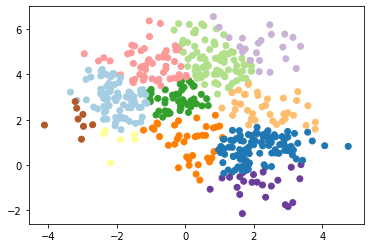

In [84]:
plt.scatter(x[:,0],x[:,1],c=clf.labels_,cmap="Paired")

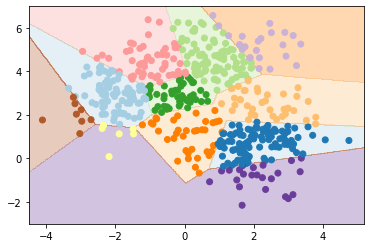

In [85]:
x0=np.arange(-4.5,5.2,0.02)
y0=np.arange(-3,7,0.02)
xm,ym=np.meshgrid(x0,y0)

P=np.c_[xm.ravel(),ym.ravel()]
z=clf.predict(P)
Z=z.reshape(xm.shape)
plt.contourf(xm,ym,Z,alpha=0.3,cmap="Paired")
plt.scatter(x[:,0],x[:,1],c=clf.labels_,cmap="Paired")

### cross_val_score

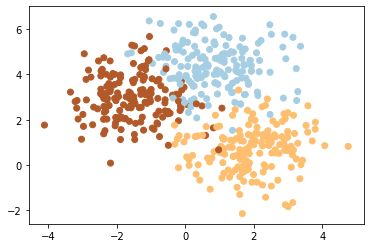

In [86]:
plt.scatter(x[:,0],x[:,1],c=y,cmap="Paired")

In [87]:
from sklearn.model_selection import cross_val_score

### SVC

In [91]:
from sklearn.svm import SVC

In [92]:
clf=SVC(gamma="auto")

In [93]:
scores=cross_val_score(clf,x,y,cv=5)

In [94]:
scores

array([0.94117647, 0.94059406, 0.98989899, 0.90909091, 0.92929293])

In [95]:
scores.max()

0.98989898989899

In [96]:
scores.mean()

0.9420106716554008

### Dicision tree

In [97]:
from sklearn.tree import DecisionTreeClassifier

In [98]:
clf=DecisionTreeClassifier()

In [99]:
scores=cross_val_score(clf,x,y,cv=5)

In [100]:
scores

array([0.91176471, 0.87128713, 0.95959596, 0.91919192, 0.88888889])

In [101]:
scores.max()

0.9595959595959596

In [102]:
scores.mean()

0.9101457204543983

### Random Forest

In [104]:
from sklearn.ensemble import RandomForestClassifier

In [110]:
clf=RandomForestClassifier(n_estimators=100)

In [111]:
score=cross_val_score(clf,x,y,cv=5)

In [112]:
scores

array([0.91176471, 0.87128713, 0.95959596, 0.91919192, 0.88888889])

In [114]:
scores.max()

0.9595959595959596

In [115]:
scores.mean()

0.9101457204543983